In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce 

# Cargamos el dataset 

In [2]:
# I'm limited by RAM here and taking the first N rows is likely to be
# a bad idea for the date data since it is ordered.
# Sample the data in a roundabout way:
cat_chunks = pd.read_csv("C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_categorical.csv", chunksize=100000)
num_chunks = pd.read_csv("C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_numeric.csv", usecols= ["Id","Response"],chunksize=100000)

X = pd.concat([pd.concat([nchunk, cchunk], axis=1).sample(frac=0.01)
               for nchunk, cchunk in zip(num_chunks, cat_chunks)])



C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,337,340,342,344,346,348,351,354,357,360,363,366,369,372,375,378,381,38

C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,206,207,209,210,212,213,215,216,218,219,221,222,224,225,227,228,230,231,233,234,236,237,239,240,242,243,245,246,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,336,337,338,339,340,341,34

C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,335,406,407,408,409,410,411,412,413,414,415,416,

C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,206,207,209,210,212,213,215,216,218,219,221,222,224,225,227,228,230,231,233,234,236,237,239,240,242,243,245,246,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,

C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,336,337,338,339,340,341,342,343,344,345,

C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,336,337,338,339,340,341,342,343,344,345,

In [3]:
y = X.Response

In [4]:
X = X.drop(["Id","Response"],axis=1)

In [5]:
categorical_col_names = X.columns.values[1:]
categorical_col_names

array(['L0_S1_F27', 'L0_S1_F29', 'L0_S1_F31', ..., 'L3_S49_F4237',
       'L3_S49_F4239', 'L3_S49_F4240'], dtype=object)

In [6]:
%%time
import category_encoders as ce   # version 1.2.8
# Target with default parameters
ce_target = ce.LeaveOneOutEncoder(verbose=1,cols = list(categorical_col_names),sigma=0.1)

Wall time: 0 ns


In [7]:
%%time
# Transform columns
ce_target.fit(X, y)

Wall time: 10min 30s


LeaveOneOutEncoder(cols=['L0_S1_F27', 'L0_S1_F29', 'L0_S1_F31', 'L0_S2_F33',
                         'L0_S2_F35', 'L0_S2_F37', 'L0_S2_F39', 'L0_S2_F41',
                         'L0_S2_F43', 'L0_S2_F45', 'L0_S2_F47', 'L0_S2_F49',
                         'L0_S2_F51', 'L0_S2_F53', 'L0_S2_F55', 'L0_S2_F57',
                         'L0_S2_F59', 'L0_S2_F61', 'L0_S2_F63', 'L0_S2_F65',
                         'L0_S2_F67', 'L0_S3_F69', 'L0_S3_F71', 'L0_S3_F73',
                         'L0_S3_F75', 'L0_S3_F77', 'L0_S3_F79', 'L0_S3_F81',
                         'L0_S3_F83', 'L0_S3_F85', ...],
                   sigma=0.1, verbose=1)

In [8]:
%%time
# Transform 
categorical_transformed = ce_target.transform(X, y)

Wall time: 10min 21s


In [9]:
categorical_transformed.shape

(11837, 2140)

In [10]:
# Save the dataset (too much time to wait each time I want to compute this...)
categorical_transformed.to_pickle("C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_categorical_encoded_10k_final.pkl")
y.to_pickle("C://Users/luisgasco/Documents/bosh_kaggle_comp/data/y_label_selected_encoded_10k_final.pkl")

In [11]:
# Save the model to load it after and modify the categorical features of the test dataset (and the train one too)
import pickle
# open a file, where you ant to store the data

filename = "C://Users/luisgasco/Documents/bosh_kaggle_comp/data/encoder_categorical_model_10k_final.sav"
pickle.dump(ce_target, open(filename, 'wb'))

# LOAD loaded_model = pickle.load(open(filename, 'rb'))


# Train XGBoost to select features

In [13]:
X = categorical_transformed.drop(["L0_S1_F25"],axis=1)
Y = y

In [14]:
import xgboost as xgb

dtrain = xgb.DMatrix(X, label=y)
watchlist = [(dtrain, 'train')]
xgb_pars = {'min_child_weight': 1, 'eta': 0.3, 'colsample_bytree': 0.9, 
        'max_depth': 6, 'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1, 'eval_metric': 'rmse', 'objective': 'reg:squarederror'}

model = xgb.train(xgb_pars, dtrain, 20, watchlist, early_stopping_rounds=4, maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

[23:39:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.35357
Will train until train-rmse hasn't improved in 4 rounds.
[1]	train-rmse:0.25202
[2]	train-rmse:0.18273
[3]	train-rmse:0.13599
[4]	train-rmse:0.10562
[5]	train-rmse:0.08672
[6]	train-rmse:0.07468
[7]	train-rmse:0.06806
[8]	train-rmse:0.06390
[9]	train-rmse:0.06133
[10]	train-rmse:0.05956
[11]	train-rmse:0.05821
[12]	train-rmse:0.05732
[13]	train-rmse:0.05629
[14]	train-rmse:0.05524
[15]	train-rmse:0.05435
[16]	train-rmse:0.05344
[17]	train-rmse:0.05219
[18]	train-rmse:0.05133
[19]	train-rmse:0.05053
Modeling RMSLE 0.05053


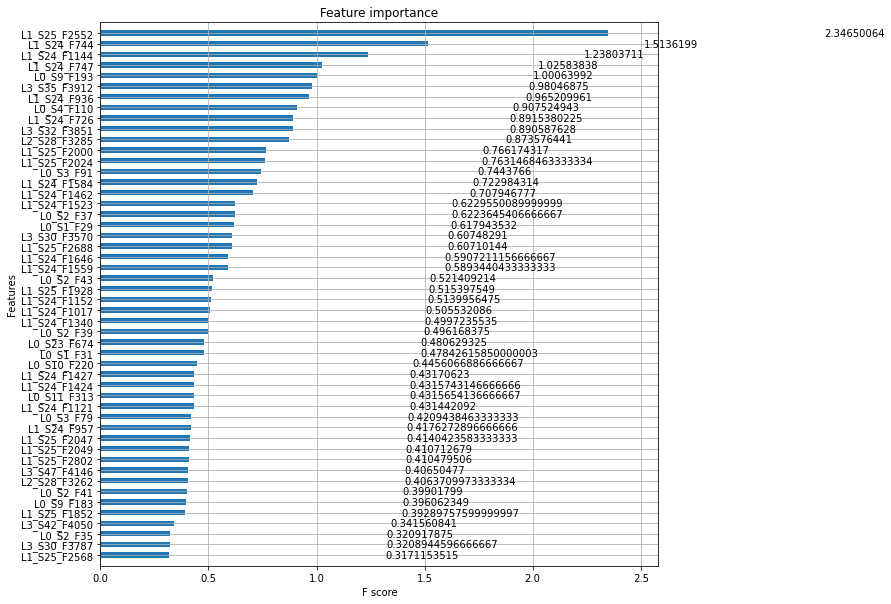

In [15]:
# Features with AUC
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(model, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

In [16]:
dict_features_selected = model.get_score(importance_type='gain')

In [17]:
categorical_selected = [*dict_features_selected]

In [20]:
len(categorical_selected)

75

In [19]:
# save list
import pickle

with open('C://Users/luisgasco/Documents/bosh_kaggle_comp/data/list_sel_cat_feat_10k.pkl', 'wb') as f:
  pickle.dump(categorical_selected, f)

# TO LOAD PICKLE
# import pickle
# with open('parrot.pkl', 'rb') as f:
#   mynewlist = pickle.load(f)

# Re-train the encoder with only the selected features

In [46]:
# Load the Response variable
num_chunks = pd.read_csv("C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_numeric.csv", usecols= ["Response"],chunksize=100000)
y_2 = pd.concat([pd.concat([nchunk], axis=1) for nchunk in num_chunks])

In [42]:
# Load the selected columns (full million of records)
cat_chunks = pd.read_csv("C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_categorical.csv", usecols = categorical_selected, chunksize=100000)
X_2 = pd.concat([pd.concat([nchunk], axis=1) for nchunk in cat_chunks])

C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (2,3,4,6,7,8,9,10,21,44,46,76,82,99,208,233,357,369,396,875,883,1022,1066,1081,1095,1096,1147,1184,1239,1321,1421,1431,1678,1693,1985,1987,2002) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (2,3,4,6,7,8,9,10,21,44,46,76,82,99,152,208,233,357,369,396,520,592,595,655,708,726,760,875,883,1022,1095,1147,1184,1239,1321,1421,1431,1678,1693,1985,1987,2002) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\luisgasco\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (2,3,4,6,7,8,9,10,21,44,46,76,82,99,152,233,357,369,371,396,580,592,595,65

In [43]:
%%time
import category_encoders as ce   # version 1.2.8
# Target with default parameters
ce_target = ce.LeaveOneOutEncoder(verbose=1,cols = list(categorical_selected),sigma=0.1)

Wall time: 0 ns


In [47]:
print(X_2.shape)
print(y_2.shape)

(1183747, 75)
(1183747, 1)


In [45]:

X_selected = X_2.loc[:, categorical_selected]
X_selected.shape

(1183747, 75)

In [48]:
%%time
# Transform columns
ce_target.fit_transform(X_selected, y_2)

Wall time: 2min 19s


,L1_S24_F726,L1_S25_F2024,L2_S28_F3285,L1_S24_F1559,L0_S1_F29,L1_S24_F1646,L0_S1_F27,L3_S35_F3912,L1_S24_F1144,L1_S24_F1523,...,L1_S24_F1370,L1_S24_F1633,L0_S2_F39,L3_S32_F3854,L3_S32_F3851,L0_S21_F475,L0_S4_F113,L1_S24_F959,L1_S24_F788,L3_S30_F3685
0,0.005379,0.005120,0.005016,0.005414,0.005365,0.005140,0.005202,0.004389,0.006853,0.006061,...,0.005674,0.006317,0.005206,0.004812,0.005167,0.004854,0.005701,0.005210,0.006178,0.005644
1,0.006114,0.004964,0.006604,0.006120,0.006659,0.004669,0.006144,0.005960,0.005277,0.005994,...,0.006045,0.005391,0.005718,0.004067,0.004525,0.006200,0.006618,0.005439,0.006003,0.005473
2,0.006533,0.005475,0.005646,0.006041,0.005373,0.005581,0.006388,0.005893,0.004922,0.005364,...,0.005891,0.005794,0.006053,0.005824,0.003698,0.005605,0.005965,0.006090,0.005907,0.005377
3,0.005830,0.006004,0.005384,0.005334,0.004782,0.006485,0.004996,0.005419,0.005802,0.005311,...,0.005468,0.006242,0.006486,0.005347,0.004885,0.005066,0.005243,0.005583,0.005272,0.006721
4,0.006327,0.006244,0.004771,0.005148,0.005548,0.006242,0.006562,0.005375,0.005154,0.005740,...,0.004807,0.006486,0.006255,0.004914,0.004966,0.005009,0.005570,0.006237,0.005580,0.004834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,0.006341,0.004317,0.005231,0.005062,0.006121,0.005495,0.005746,0.005677,0.005168,0.005776,...,0.005912,0.007320,0.005911,0.003971,0.004937,0.004730,0.005643,0.006353,0.005280,0.005718
1183743,0.005072,0.004780,0.005171,0.005138,0.005746,0.005238,0.005494,0.006576,0.006011,0.004271,...,0.005971,0.005888,0.005388,0.004534,0.005525,0.005272,0.005665,0.005494,0.004487,0.004657
1183744,0.005427,0.005889,0.006044,0.005686,0.006012,0.006235,0.004802,0.006266,0.005967,0.005703,...,0.005729,0.005780,0.006268,0.005191,0.004820,0.004842,0.004674,0.005730,0.005209,0.006125
1183745,0.006532,0.005989,0.006902,0.005951,0.006021,0.005517,0.005969,0.005114,0.005342,0.006588,...,0.005985,0.006315,0.006024,0.004160,0.005159,0.005183,0.006085,0.006311,0.005590,0.005289


In [49]:
ce_target

LeaveOneOutEncoder(cols=['L1_S24_F726', 'L1_S25_F2024', 'L2_S28_F3285',
                         'L1_S24_F1559', 'L0_S1_F29', 'L1_S24_F1646',
                         'L0_S1_F27', 'L3_S35_F3912', 'L1_S24_F1144',
                         'L1_S24_F1523', 'L0_S2_F41', 'L1_S25_F2000',
                         'L1_S25_F2552', 'L1_S24_F936', 'L0_S1_F31',
                         'L0_S10_F220', 'L1_S24_F1584', 'L0_S11_F313',
                         'L1_S24_F1121', 'L1_S24_F1424', 'L1_S24_F1427',
                         'L1_S24_F1462', 'L0_S9_F183', 'L1_S24_F1152',
                         'L0_S2_F37', 'L0_S3_F79', 'L1_S24_F957',
                         'L1_S24_F1340', 'L0_S23_F674', 'L1_S25_F2047', ...],
                   sigma=0.1, verbose=1)

In [32]:
%%time
# Transform (no need to do this in this case)
categorical_transformed = ce_target.transform(X_selected, y)

Wall time: 972 ms


In [ ]:
# Save the transformer

In [50]:
# Save the model to load it after and modify the categorical features of the test dataset (and the train one too)
import pickle
# open a file, where you ant to store the data

filename = "C://Users/luisgasco/Documents/bosh_kaggle_comp/data/encoder_categorical_model_FULL_FINAL_TRUE.sav"
pickle.dump(ce_target, open(filename, 'wb'))

# LOAD loaded_model = pickle.load(open(filename, 'rb'))
